<h4 class='prehead'>SM286D &middot; Introduction to Applied Mathematics with Python &middot; Spring 2021 &middot; Foraker/Lazzaro</h4>

<h3 class='lesson'>Project 1.</h3>

<h1 class='lesson_title'>Plotting Histograms and Density Functions</h1>

__Mathematical goals.__  Histograms and density functions, visualizing data

__Programming goals.__ for loops, figures, plots, subplots

In this project we will use Python to introduce some ideas about data analysis and fitting distributions.  These topics will be explored in more detail in other courses in the Operations Research curriculum such as SA421 - Simulation Modeling. 

###  Overview

In this assignment we will focus on using visualization, specifically plotting histograms and density functions, as ONE component in the process of choosing a distribution to represent data.  It should be noted that **choosing a distribution to represent data is an art**: there is NO algorithm which produces a "correct" distribution that fits a given set of input data.  Two factors that make it difficult to choose a distribution are:

 - the large number of probability distributions that exist;
 - assessing how well any particular choice of distribution models the data.
 
In this project we will focus on just two distributions to model the given data, the normal and exponential.  We will only use visual methods as a way to assess the distributions we choose.  You will learn more about evaluating the fit such as goodness-of-fit criteria and the Komogorov-Smirnov statistic in SA421.

### The normal distribution

The normal distribution is perhaps the most significant distribution due to the central limit theorem: under the assumption of finite variance, independent samples of a distribution converges to a normal distribution.

Let $X$ denote a normal random variable.  Any normal distribution is determined by its mean $\mu$ and standard deviation $\sigma$.

The density function is defined for any real $x$ as:

\begin{equation*} 
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}} . 
\end{equation*}

Note the domain of the density function is the whole real line.  The **standard normal distribution** is when the mean is $\mu = 0$ and standard deviation is $\sigma = 1$.  Below is some code used to plot some density functions of different normal distributions:

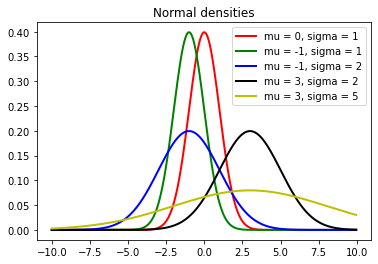

In [2]:
import math
import matplotlib.pyplot as plt

mu_list = [0,-1,-1,3,3]
sigma_list = [1,1,2,2,5]
color_list = ['r', 'g', 'b', 'k', 'y']

x = [-10 + 20/500*i for i in range(500)]

fig = plt.figure()
ax = plt.subplot(111)
plt.title('Normal densities')

for i in range(len(mu_list)):
    mu = mu_list[i]
    sigma = sigma_list[i]
    y = [1/(sigma * math.sqrt(2 * math.pi)) * math.exp( - (value - mu)**2 / (2 * sigma**2) ) for value in x]
    ax.plot(x, y, linewidth=2, color=color_list[i], label = f'mu = {mu_list[i]}, sigma = {sigma_list[i]}')
ax.legend()
plt.show()

### The exponential distribution

The exponential distribution is a special case of the gamma distribution and both are often used to model wait times for different processes.  

Let $X$ denote an exponential random variable.  The exponential distribution has a single parameter, $\beta > 0$, which is called the scale parameter.

The domain of the density function is the **positive** real numbers, $x \ge 0$, and is given by the following:

\begin{equation*} 
f(x) =
  \begin{cases}
                                   \frac{1}{\beta} e^{\frac{-x}{\beta}} & \text{if $x \ge 0$}, \\
                                   0 & \text{if $x<0$}. 
  \end{cases} 
\end{equation*}

Below is some code used to plot some density functions of different exponential distributions:

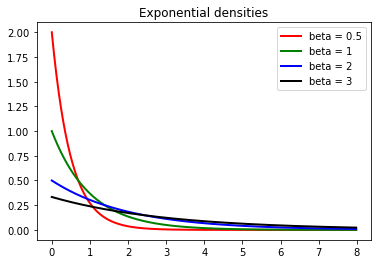

In [3]:
beta_list = [0.5,1,2,3]
color_list = ['r', 'g', 'b', 'k']

x = [0 + 8/400*i for i in range(400)]

fig = plt.figure()
ax = plt.subplot(111)
plt.title('Exponential densities')

for i in range(len(beta_list)):
    beta = beta_list[i]
    y = [(1/beta)*math.exp(-value/beta) for value in x]
    ax.plot(x, y, linewidth=2, color=color_list[i], label = f'beta = {beta_list[i]}')
ax.legend()
plt.show()

### Histograms

Visually inspecting data is key to finding a good fitted distribution.  A histogram is a way of depicting the frequency of data points in the predefined intervals, or **bins**.  The code below takes some randomly generated data and plots a histogram to represent it.

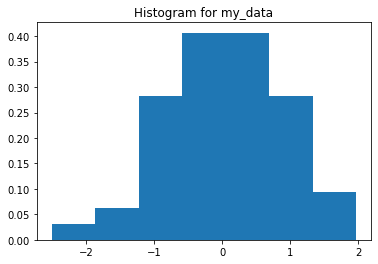

In [4]:
my_data = [0.66698806,  0.02581308, -0.77761941,  0.94863382,  0.70167179, -1.05108156,
 -0.36754812, -1.13745969, -1.32214752,  1.77225828, -0.34745899,  0.67014016,
  0.32227152,  0.06034293, -1.04345,    -1.00994188,  0.44173637,  1.12887685,
 -1.83806777, -0.93876863, -0.20184052,  1.04537128,  0.53816197,  0.81211867,
  0.2411063,  -0.95250953, -0.13626676,  1.26724821,  0.17363364, -1.22325477,
  1.41531998,  0.45771098,  0.72887584,  1.96843473, -0.54778801, -0.67941827,
 -2.50623032,  0.14696049,  0.60619549, -0.02253889,  0.01342226,  0.93594489,
  0.42062266,  0.41161964, -0.07132392, -0.04543758,  1.04088597, -0.09403473,
 -0.42084395, -0.55198856]

fig = plt.figure()
ax = plt.subplot(111)
plt.title('Histogram for my_data')
plt.hist(my_data,bins='fd', density=True)
plt.show()

Based on the histogram, which type of distribution (normal or exponential) do you think is appropriate to model the data? 

You should be careful with the number of bins in the histogram!  You can use the `bins` parameter of `plt.hist` to adjust the number of bins.  The **Freedman-Diaconis method** for determining the number of bins used in a histogram is robust and widely used, and was selected as the choice in the code above by specifying `fd` as the choice for `bins`.  The **Freedman-Diaconis method** calculates the number of bins via the formula

\begin{equation*} 
b = 2 \frac{q}{n^{1/3}} , 
\end{equation*}

where $b$ denotes the bin size, $q$ denotes the difference between the 75th and 25th percentiles, and $n$ denotes the number of samples.

### Drawing a figure with subplots

As part of this project, you will be asked to produce a figure with several subplots.  Figure 1 below shows a figure containing two plots, appearing in a $1 \times 2$ array. 

<div>
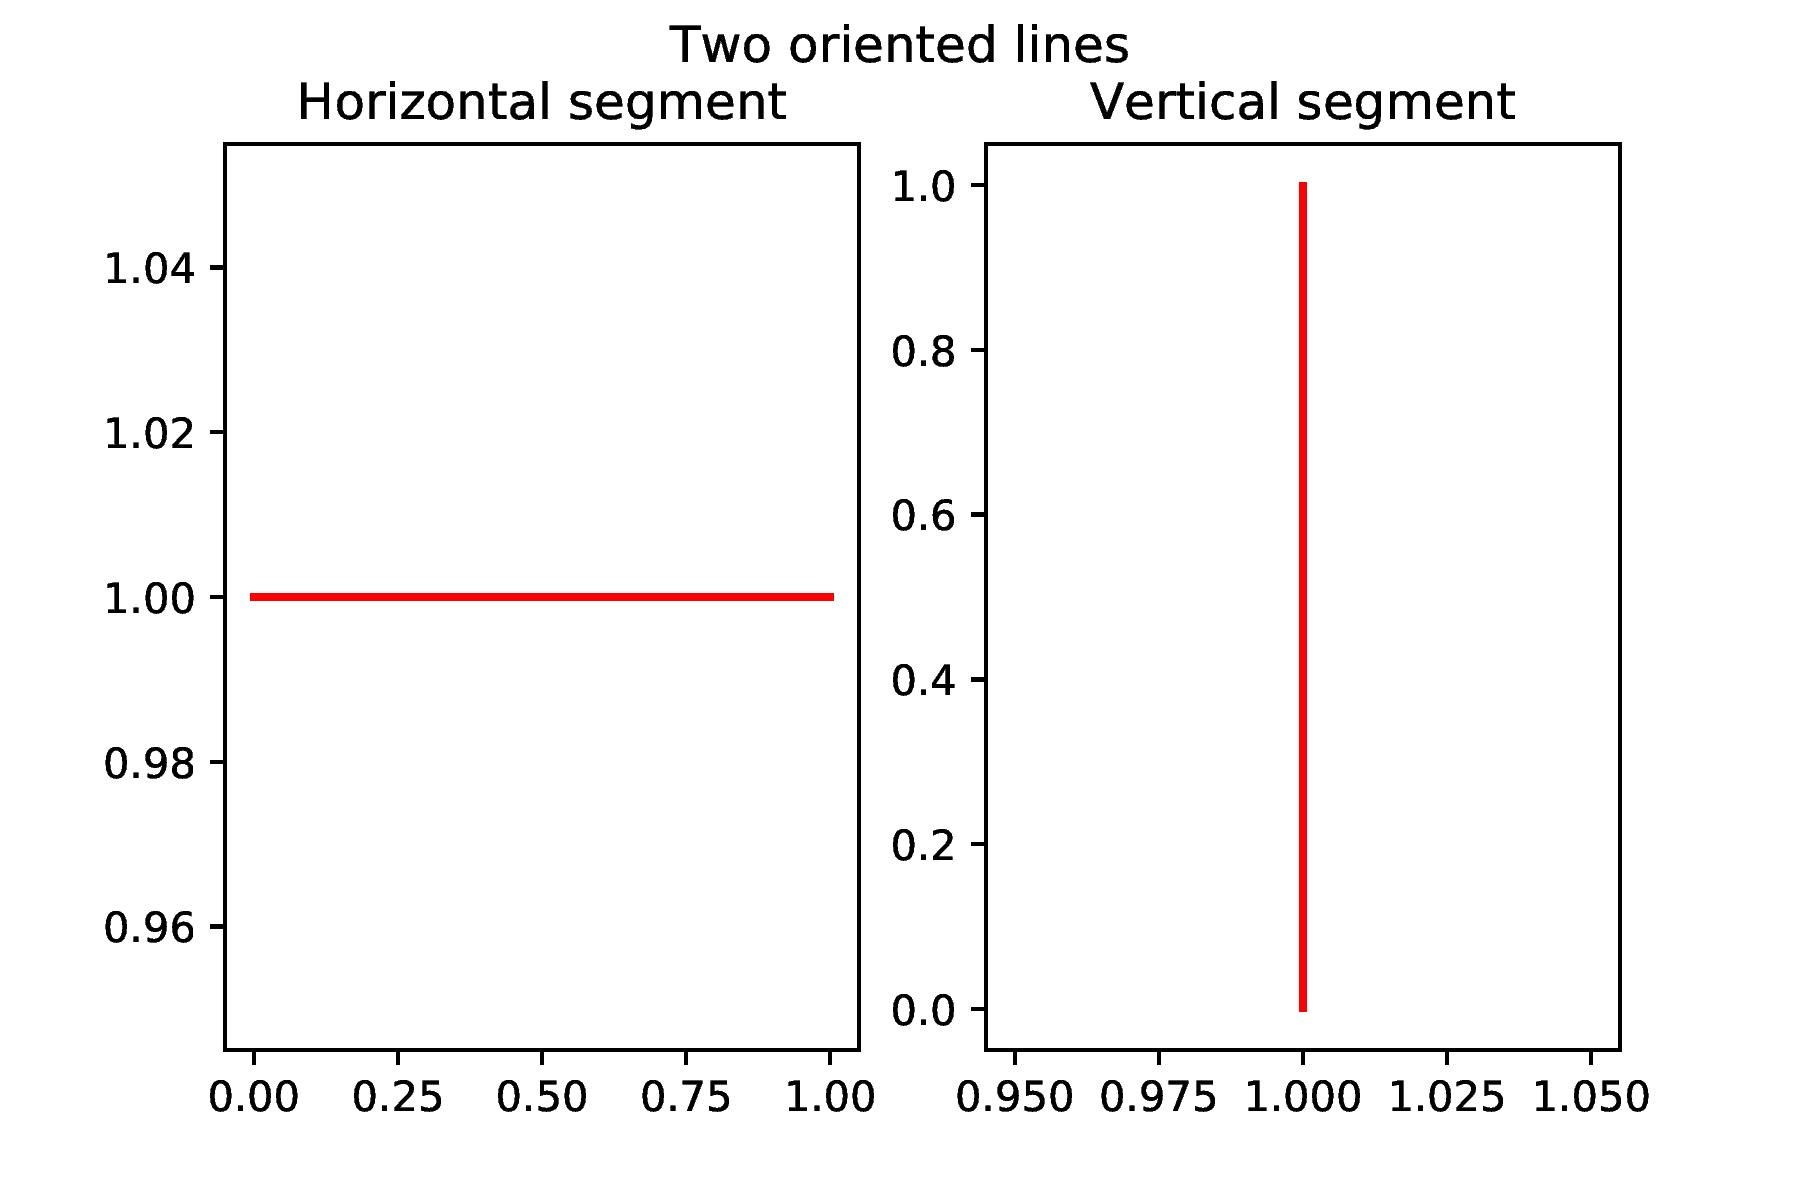
</div>

<center> Figure 1: A figure with two plots </center>

This figure was produced with the following code:

Text(0.5, 1.0, 'Vertical segment')

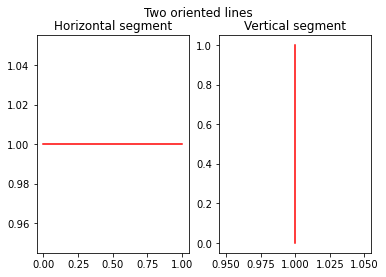

In [5]:
# import packages
import matplotlib.pyplot as plt

# create figure with a title
fig = plt.figure()
fig.suptitle("Two oriented lines")
# make the first of 2 plots in a 1x2 array of plots inside our figure
ax = fig.add_subplot(1, 2, 1)
ax.plot([0,1],[1,1],'r')
ax.set_title("Horizontal segment")
# make the second of 2 plots in a 1x2 array of plots inside our figure
ax = fig.add_subplot(1, 2, 2)
ax.plot([1,1],[0,1],'r')
ax.set_title("Vertical segment")

Line 6 (hit the <kbd>Esc</kbd> key and then hit the <kbd>l</kbd> (lower case letter L) key to toggle line numbers on and off in a code cell in Jupyter) adds a title to the entire figure while lines 10 and 14 add titles to the subplots. Lines 8 and 12 set the current axes to the correct subplots. Note that the `fig.add_subplot` command takes three arguments: the number of rows of subplots, the number of columns of subplots, the subplot that is being added. Subplot numbers are assigned in typewriter fashion, moving left to right along a row and then dropping to the next row. 

### Your Project:

You will modify the code cells below to complete this project. Change the filename of this file, replacing LASTNAME with your last name. 

#### Normal Data Portion

Set the variable `r` to 2, `c` to 2, `mu_list` to the list [0,-0.5,0.5,1], and `sigma_list` to the list [1,1,0.8,0.8]. Your code should should draw `r*c` figures with the **same** histogram (based on the given data `my_norm_data`) in each figure but a different normal density function in each figure where the parameters $\mu$ and $\sigma$ for the different density functions are given in the lists `mu_list` and `sigma_list`, respectively. The figures should appear in an `r` $\times$ `c` array of subplots, complete with individual titles for each subplot and a title for the entire figure, as in Figure 2 below. 

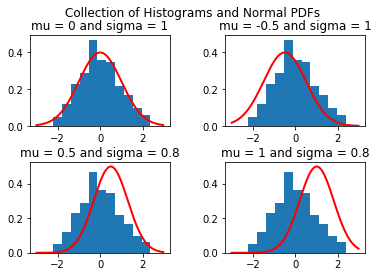

<center> Figure 2: The image produced for the given normal data </center>

You should use a **nested for loop** (a **for loop** inside a **for loop**) or a **list comprehension** to produce the required output. You should carefully document your code. At the minimum this should include a one-line header with a brief description of the code's purpose and a more detailed header with: author's name and contact information, date last edited, a description of the code's purpose, a description of the parameters (`r`, `c`, `mu_list`, `sigma_list`, and `beta_list` - provided below), and a description of the output. As well, you should include further comments in your code. 

You must provide a print statement after your plots that indicates which of the density functions you think is the best fit for the given normal data.

In [6]:
#############################################################################
# DO NOT MODIFY THE CODE IN THIS CELL, JUST RUN IT TO DEFINE THE DATA BELOW
#############################################################################

# import packages
import math
import matplotlib.pyplot as plt

# Below is the given normal data
my_norm_data = [1.63019808,  1.10073589,  2.06223012,  0.46401601,  1.65206334,  0.25922487,
 -0.46316407, -1.46398247, -0.30532938,  1.11649215,  1.92491589, -0.253509,
  1.3647869,   1.65219977, -1.94616457,  1.41985742,  0.58905056,  0.62443324,
 -0.18635681,  0.12747123, -0.17307431, -1.7567247,   2.13330145, -0.30926192,
 -0.50763542, -1.21583688, -0.93831764, -1.18553654,  1.10623614,  0.181178,
 -0.0650886,   0.64435754,  0.78327881, -0.06288281, -0.15177811, -0.1747229,
  0.66276697, -0.04781049, -0.08995647, -0.52939899,  0.87630499,  0.64584007,
 -0.72299889,  0.25349786, -1.4222941,  -0.21634908, -0.96742654,  0.68114803,
 -0.79128242, -0.68585123,  2.36783368, -0.05585545,  0.58075107, -0.4991764,
  0.5140605,  -0.61785086,  0.47382545, -0.64576212, -0.29909176,  1.42641698,
 -1.05657461, -1.09308421, -1.91279634,  1.6167223,   0.07624055,  0.30728674,
 -0.88151405,  1.83890825,  0.19009995, -0.90866029, -0.8531006,   0.88882339,
  2.28926927, -1.29422313, -0.69997783, -0.80655444, -0.27459588,  0.06108991,
  0.55304006, -1.46720348, -0.65689031, -0.0098607,  -1.18834767, -0.43941531,
 -0.4687906,  -0.01616325, -0.22354459,  1.93468057,  0.48944633,  0.42773085,
 -0.30233738,  0.86817489, -1.06404795,  0.27319666, -0.48523957, -0.03863856,
  0.62969042, -0.98132641, -0.19735913,  0.21067031, -0.62317565, -1.26142085,
 -0.21391804,  0.18939428,  0.17550555, -0.91122093,  0.76005489, -0.18217718,
  0.32034907,  0.59530016, -0.50491964,  0.50488128,  1.38085663,  0.96297755,
  1.3799329,  -0.99993727,  1.49259734, -1.09999539,  0.98506758, -0.21675019,
 -0.13919721, -0.05249682,  1.38350375, -0.71563502, -1.50099077, -0.59385063,
  0.1862516,   0.35092607, -1.28670678,  0.58895599, -0.37948455, -0.40923911,
 -0.58537418,  0.13813463,  0.64134916, -0.67030436, -0.02967847, -0.29702066,
 -0.34011984, -1.0674362, -1.57824187,  0.96011477,  0.03735634, 1.05114322,
 -0.12865731,  0.90883497,  0.01693048,  0.29704706, -0.3048463,   0.07830598,
  0.73364995,  0.93760414,  0.53271371, -0.56959324, -1.19688745,  0.57768536,
 -0.84382202,  0.53347977, -0.49224397, -0.24976479, -0.22475676,  0.36746481,
  1.51503006, -1.41723367, -0.43209908, -0.43328085, -1.41739211, -0.02040517,
 -1.04324073,  1.41239199,  0.83557289, -1.23326606,  2.04351217, -0.37898166,
  1.34651754, -0.58090518,  1.40061085, -0.82781836, -0.46388403, -2.21167915,
 -1.63059353, -0.89209998, -0.18933422,  1.29697635,  0.56702193,  0.74244869,
  1.11733287, -0.32323721,  0.34507202,  1.20487174, -1.9655566,   0.0764207,
  0.21201638, -0.93769603,  1.90010053, -1.57748233, -1.12699338, -1.14676241,
  0.50090028,  1.27070076]

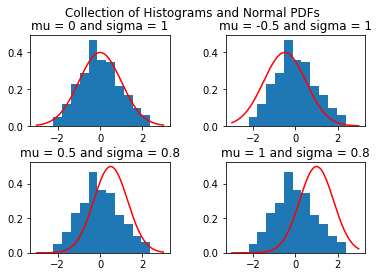

In [7]:
'''
This code draws an r x c set of histograms for the data set my_norm_data, along with normal
density plots for different 𝜇 and 𝜎 values.

Created by: MIDN Sam Shin (m245922@usna.edu)
Date created: 01/31/2021
Date edited: 02/01/2021

Purpose: to draw an r x c set of histograms and various normal density plots, with varying
𝜇 and 𝜎 values, to model the data set my_norm_data.

Output: r x c graphs, each with the same histogram for my_norm_data, and each with a different
normal density plot. Each normal density plot is modeled using the 𝜇 and 𝜎 values given in 
mu_list and sigma_list, respectively. The overall figure and subplots are all labeled.

Parameters: 
r : number of rows in the grid of subplots
c : number of columns in the grid of subplots
mu_list : a list of the 𝜇 values used for the subplots
sigma_list : a list of the 𝜎 values used for the subplots

'''
# create parameters
r = 2
c = 2
mu_list = [0,-0.5,0.5,1] 
sigma_list = [1,1,0.8,0.8]

# create figure with a title
fig = plt.figure()
fig.suptitle("Collection of Histograms and Normal PDFs")

# create the list of x values for each subplot
x = [-3 + 6/500*i for i in range(500)]

for k in range(0,4):
    # make 4 histograms in a 2x2 array of plots
    ax = fig.add_subplot(r, c, k+1)
    plt.hist(my_norm_data, bins='fd', density=True)
    # label the 4 histograms
    mu = mu_list[k]
    sigma = sigma_list[k]
    ax.set_title(f"mu = {mu} and sigma = {sigma}")
    # plot normal distribution curves
    y = [1/(math.sqrt(2*math.pi*(sigma**2))) * math.exp(-(value-mu)**2/(2*sigma**2)) for value in x]
    ax.plot(x, y, color='r')

# adjust spacing and display plots
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [8]:
# Insert a print statement here that indicates which of the four density functions you think 
# is the best fit for the given my_norm_data

print("I believe that the normal density function of mu = 0 and sigma = 1 is the best fit for my_norm_data.")

I believe that the normal density function of mu = 0 and sigma = 1 is the best fit for my_norm_data.


#### Exponential Data Portion

Set the variable `r` to 2, `c` to 2, and `beta_list` to the list [0.5,1,2,4]. Your code should should draw `r*c` figures with the **same** histogram (based on the given data `my_exp_data`) in each figure but a different exponential density function in each figure where the parameter $\beta$ for the different density functions are given in the list `beta_list`. The figures should appear in an `r` $\times$ `c` array of subplots, complete with individual titles for each subplot and a title for the entire figure, as in Figure 3 below. 

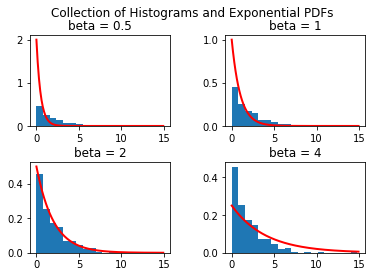

<center> Figure 3: The image produced for the given exponential data </center>

You should use a **nested for loop** (a **for loop** inside a **for loop**) or a **list comprehension** to produce the required output. 

You must provide a print statement after your plots that indicates which of the density functions you think is the best fit for the given exponential data.  You should carefully document your code.  Submit your final Jupyter notebook (Project 01 Histograms - LASTNAME.ipynb) to your instructor. 

In [9]:
#############################################################################
# DO NOT MODIFY THE CODE IN THIS CELL, JUST RUN IT TO DEFINE THE DATA BELOW
#############################################################################

# Below is the given exponential data
my_exp_data = [1.86460822e+00, 2.14303480e+00, 7.34146234e-01, 6.54052168e+00,
 1.53539195e+00, 2.15547160e+00, 1.47604160e+01, 2.78047567e+00,
 1.54664268e+00, 2.73695174e+00, 5.37323410e-01, 1.07690926e+00,
 3.72891527e+00, 1.04056286e+00, 1.28703300e+00, 2.36298272e+00,
 4.09535284e-01, 1.41434837e-01, 1.94726777e+00, 1.83767980e+00,
 4.07191544e+00, 1.08164421e-01, 1.68359395e+00, 1.03951368e+00,
 3.24417089e+00, 3.07769843e+00, 3.01658760e+00, 1.94201209e-01,
 6.39713545e+00, 3.71531649e+00, 6.34016333e-01, 1.29828052e+00,
 1.29844972e+00, 2.12763995e+00, 4.48915436e-01, 9.40592498e-01,
 6.53147368e-01, 7.85419508e-01, 1.63754151e+00, 3.93801316e+00,
 5.91096689e+00, 1.21302725e+00, 1.25363865e+00, 5.23742369e+00,
 2.72906048e-01, 3.88293238e-01, 1.26141355e+00, 5.85927205e+00,
 1.72934137e+00, 2.94743489e-03, 8.44588396e-02, 1.09658899e+00,
 2.55009361e+00, 3.21184594e+00, 2.05923156e+00, 1.94260456e-01,
 1.21460765e+00, 4.59743584e-01, 2.42704244e+00, 4.76243487e-01,
 6.17142636e-02, 7.02617627e-02, 5.78125635e-01, 4.78452233e-01,
 1.37472537e+00, 1.95082874e+00, 4.93150440e-01, 3.51437304e+00,
 3.79806420e-01, 2.95770670e+00, 3.40655333e-01, 2.78832988e+00,
 3.09990586e+00, 1.15844491e+00, 7.08409864e-01, 7.27706390e-01,
 1.67529983e+00, 1.09085582e+00, 4.30879714e-02, 2.33531012e-02,
 3.08125639e-02, 5.01669907e+00, 5.41449395e+00, 5.57730790e-02,
 7.24442607e+00, 1.92165631e+00, 2.15419170e+00, 1.10183973e+00,
 2.22875119e-01, 1.74714676e+00, 3.96621873e-01, 1.02090391e+01,
 2.74734474e+00, 6.10594344e-01, 1.21882349e+00, 1.72193033e+00,
 4.86843007e-01, 5.84929463e-01, 1.86511659e+00, 4.34551090e-02,
 5.67273753e-01, 1.80961186e+00, 1.35952576e+00, 1.05097888e-01,
 9.68733325e-01, 4.11726127e-01, 1.32210765e+00, 5.48277485e-02,
 2.35811029e+00, 1.29927671e+00, 3.17964526e+00, 3.64962744e+00,
 4.50947319e+00, 2.13188686e-01, 4.27848965e+00, 9.14194538e-01,
 1.79277203e+00, 3.05929650e-01, 1.24200463e+00, 6.14246627e-02,
 3.52754107e+00, 4.55081812e+00, 2.83811914e-01, 5.39387674e+00,
 1.04832013e-01, 3.39365206e-01, 1.40769175e-01, 2.38857911e-01,
 6.24265731e+00, 6.09348537e-01, 4.47385461e-01, 2.35674002e+00,
 3.89500327e+00, 3.61150995e-01, 5.14201649e-01, 9.08220585e-01,
 3.48305660e+00, 2.85899451e-01, 2.19894983e-01, 1.71721675e+00,
 1.02152512e+00, 4.98662668e+00, 4.46535706e+00, 2.48511985e+00,
 3.33445877e+00, 4.18347425e-01, 2.04787670e+00, 2.42086436e+00,
 2.66664542e+00, 6.57488917e+00, 5.02966283e+00, 2.99679419e-01,
 8.86494934e-01, 2.38074116e+00, 9.38115700e-01, 2.21985115e+00,
 1.07804446e+00, 4.21828365e+00, 7.84706173e-01, 7.07295010e-02,
 9.39211064e-01, 2.71065966e+00, 1.03538765e+00, 5.95800357e-01,
 5.16890264e+00, 2.58439639e+00, 4.62183376e-01, 2.13317672e-02,
 1.96774569e+00, 5.08287399e-01, 3.50698938e-01, 4.10351583e-01,
 1.85725780e+00, 1.14079541e-01, 4.68072825e-01, 3.01690829e+00,
 2.70572856e-02, 1.20070729e+00, 3.29518069e-01, 9.85593774e-01,
 1.88690544e+00, 7.65451886e-01, 4.22309274e+00, 1.44090272e+00,
 4.62601872e+00, 1.17119905e+00, 8.89013179e+00, 1.50082840e+00,
 1.94230596e+00, 5.59101539e-02, 2.99481288e+00, 2.51889898e+00,
 4.12410236e-01, 3.15352692e+00, 6.17465658e+00, 2.92949982e+00,
 4.40471131e+00, 3.84974622e-01, 2.04193732e+00, 4.72578827e-01]

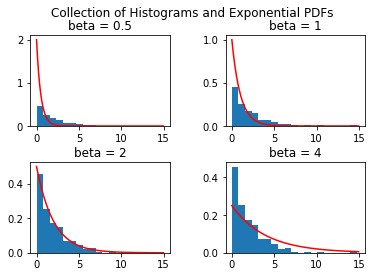

In [10]:
'''
This code draws an r x c set of histograms for the data set my_exp_data, along with exponential
density plots for different 𝛽 values.

Created by: MIDN Sam Shin (m245922@usna.edu)
Date created: 01/31/2021
Date edited: 02/01/2021

Purpose: to draw an r x c set of histograms and various exponential density plots, with varying
𝛽 values, to model the data set my_exp_data.

Output: r x c graphs, each with the same histogram for my_exp_data, and each with a different
exponential density plot. Each exponential density plot is modeled using the 𝛽 values given in 
beta_list. The overall figure and subplots are all labeled.

Parameters: 
r : number of rows in the grid of subplots
c : number of columns in the grid of subplots
beta_list : a list of the 𝛽 values used for the subplots

'''

# create parameters
r = 2
c = 2
beta_list = [0.5,1,2,4]

# create figure with a title
fig = plt.figure()
fig.suptitle("Collection of Histograms and Exponential PDFs")

# create the list of x values for the subplots
x = [15/500*i for i in range(500)]

for k in range(0,4):
    # make 4 histograms in a 2x2 array of plots
    ax = fig.add_subplot(r, c, k+1)
    plt.hist(my_exp_data, bins='fd', density=True)
    # label the 4 histograms
    beta = beta_list[k]
    ax.set_title(f"beta = {beta}")
    # plot exponential distribution curves
    y = [((1/beta)*math.exp(-value/beta)) for value in x]
    ax.plot(x, y, color='r')
    
# adjust spacing and display plots
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [11]:
# Insert a print statement here that indicates which of the four density functions you think 
# is the best fit for the given my_exp_data

print("I believe that the exponential density function of beta = 2 is the best fit for my_exp_data.")

I believe that the exponential density function of beta = 2 is the best fit for my_exp_data.


## When you're finished

- Make sure your notebook runs from top to bottom with no errors. One way to accomplish this is to click on __Kernel &#8594; Restart & Run All__. This will restart Python, and run your notebook from top to bottom.

- When you're ready, submit this notebook to the course Blackboard site.

<hr style="border:2px solid gray"> </hr>

Your work will be **graded** as follows (40 total points):

```
Figure:   correct images of 8 histograms and density functions (8 pts)
Figure:   images appear in an array (4 pts)
Figure:   correct titles for each subplot (8 pts)
Figure:   correct title for entire figures (6 pts)
Code:     nested for loop is correctly implemented (5 pts)
Code:     print statements provided indicating best choice of density function for each data set (6 pts)
Comments: other in-line comments (3 pts)
```